# Charging Station Behavior
### Georgia Tech EV Charging Station transactions and miles driven
link: https://www.kaggle.com/claytonmiller/campus-electric-vehicle-charging-stations-behavior  
git https://github.com/Sheldon-Zhang/Gatech_EV_Analytics
<hr>

# Imports
<hr>

In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
# 
import matplotlib.dates as mdates
#
from matplotlib.dates import DateFormatter

import seaborn as sns
import numpy as np

# set figure size 
sns.set(rc={'figure.figsize':(21,9)})

# Data Ingestion
<hr>

In [3]:

df = pd.read_csv('../data/ev_charging_datasets/Georga_EV_charge_behavior/EV-Charging-Raw-Data.csv')

In [4]:
df.shape

(1530, 30)

In [5]:
df.head(3)

,Label 01,Lable 02,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Postal Code,Country,Label 07,Label 08,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
0,A,A,Georgia Tech,2/13/2015 13:30,EST,2/13/2015 14:42,EST,2/13/2015 11:46,1:12:10,1:11:50,...,30308,United States,A,A,USD,1.02,Plug Out at Vehicle,540,30102,254811.0
1,A,A,Georgia Tech,2/13/2015 12:47,EST,2/13/2015 13:45,EST,2/13/2015 10:46,0:58:39,0:58:15,...,30308,United States,A,A,USD,0.83,Customer,539,30269,323807.0
2,A,A,Georgia Tech,2/13/2015 11:50,EST,2/13/2015 13:02,EST,2/13/2015 10:04,1:11:40,1:11:24,...,30308,United States,A,A,USD,1.02,Plug Out at Vehicle,538,30253,345151.0


In [6]:
df.tail(3)

,Label 01,Lable 02,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Postal Code,Country,Label 07,Label 08,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID
1527,A,A,Georgia Tech,2/13/2015 6:35,EST,NaN,EST,NaN,9:05:05,6:38:01,...,30308,United States,A,A,NaN,0.0,NaN,791,30114,235945.0
1528,A,A,Georgia Tech,2/13/2015 15:03,EST,NaN,EST,NaN,0:35:09,0:34:44,...,30308,United States,A,A,NaN,0.0,NaN,1423857773,30345,183185.0
1529,A,A,Georgia Tech,2/13/2015 7:43,EST,NaN,EST,NaN,7:55:25,7:36:11,...,30308,United States,A,A,NaN,0.0,NaN,792,30622,217113.0


In [7]:
df.head(1).T

,0
Label 01,A
Lable 02,A
Org Name,Georgia Tech
Start Date,2/13/2015 13:30
Start Time Zone,EST
End Date,2/13/2015 14:42
End Time Zone,EST
Transaction Date (Pacific Time),2/13/2015 11:46
Total Duration (hh:mm:ss),1:12:10
Charging Time (hh:mm:ss),1:11:50


In [8]:
df.columns



Index(['Label 01', 'Lable 02', 'Org Name', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Label 03', 'Label 04', 'Label 05',
       'Label 06', 'Postal Code', 'Country', 'Label 07', 'Label 08',
       'Currency', 'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'User ID'],
      dtype='object')

# Feature Creation 
<hr>

In [17]:
# A slice of the data frame 
#    - 

df = df[['Start Date',
'Total Duration (hh:mm:ss)',
'Charging Time (hh:mm:ss)',
'Energy (kWh)',
'Port Type',
'Gasoline Savings (gallons)',
'Postal Code',
'Ended By',
'Fee',
'Driver Postal Code',
'User ID']]

df.head(3)

KeyError: "['Start Date'] not in index"

In [ ]:
# set start time to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [ ]:
# create a column with day of the week 
df['day_of_week'] = df['Start Date'].dt.dayofweek
# creats a column with week
df['week'] = df['Start Date'].dt.week
# creats a column with month
df['month'] = df['Start Date'].dt.month
# creates a varable to count numer of events that day
df['count_event'] = 1

In [10]:
# DateTime Manipulation 
df.set_index('Start Date', inplace = True)
df.sort_index(inplace = True)





In [11]:
df['date'] = df.index.dt.date
df['time'] = pd.to_datetime('timestamp')

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [ ]:


df['time'] = df.index.hour #strftime("%H.%M")



[]

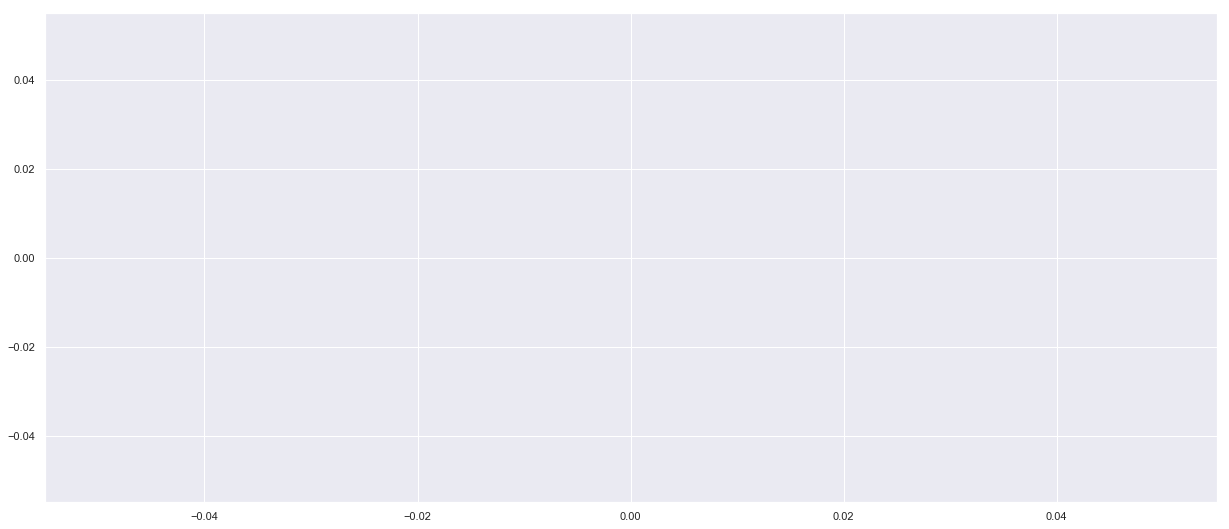

In [ ]:
plt.plot(x = df['time'], )

In [ ]:

# Create dataframe for visualization
# duplicate df
df_graph = df.copy()
# create sum per WEEK
df_graph = df_graph.resample('w').sum()

## Quick Exploration
<hr>
<br>

#### Port Type

In [16]:
df['Port Type'].value_counts()

Level 2    1530
Name: Port Type, dtype: int64

#### Plug Type

In [13]:
df['Plug Type'].value_counts()

J1772    1530
Name: Plug Type, dtype: int64

#### GHG Savings

In [ ]:
df['GHG Savings (kg)'].describe()

count    1530.000000
mean        3.906703
std         2.758232
min         0.000000
25%         2.265250
50%         3.751000
75%         5.198750
max        35.862000
Name: GHG Savings (kg), dtype: float64

#### Postal code 

In [ ]:
df['Postal Code'].value_counts()

30308    1530
Name: Postal Code, dtype: int64

#### Driver Postal Codes

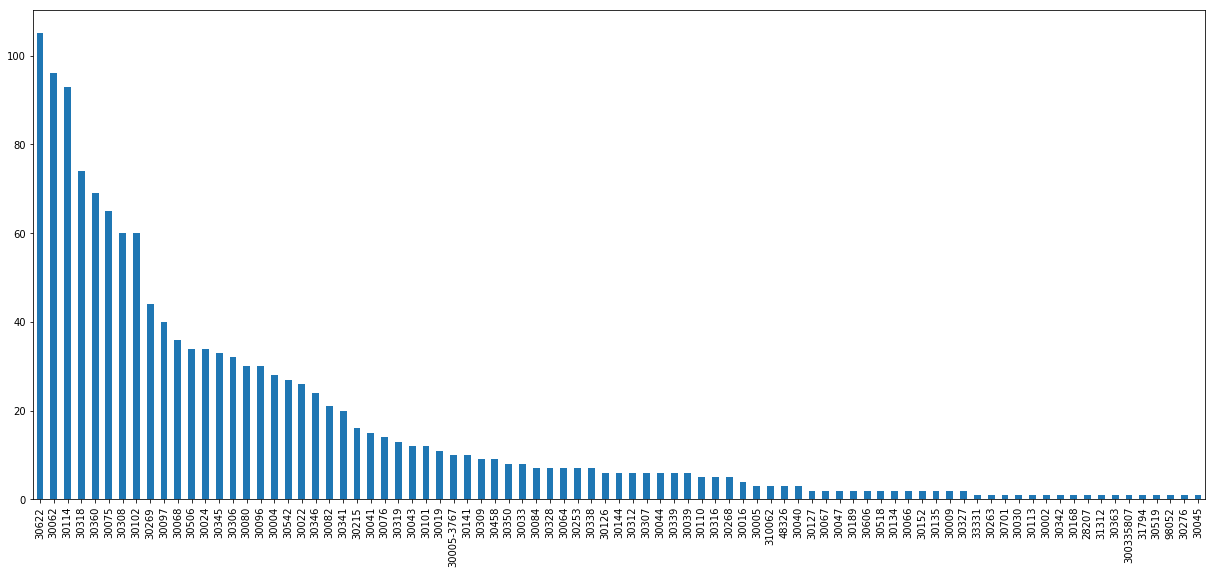

In [ ]:
df['Driver Postal Code'].value_counts().plot(kind='bar', figsize = (21,9))

28.666666666666668


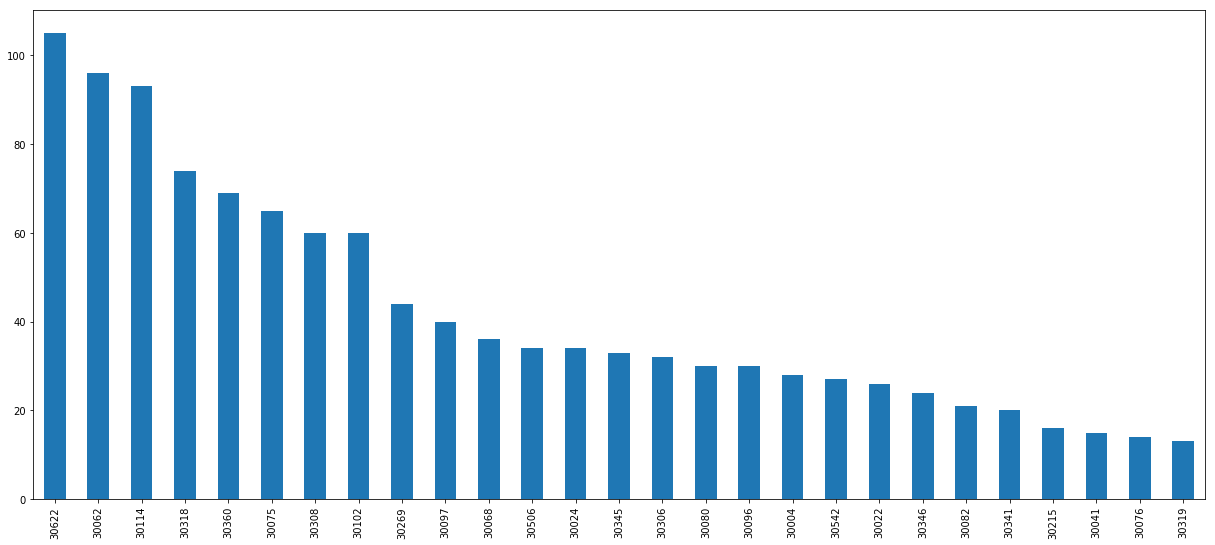

In [ ]:
# Top 1/3 of Driver Postal Code 

print(len(pd.unique(df['Driver Postal Code'])) / 3 )

# Variable - index zip code , [1] counts
top_third_driverPostalCode = df['Driver Postal Code'].value_counts().sort_values(axis=0, ascending = False).head(27)

# Graph 
df['Driver Postal Code'].value_counts().sort_values(axis=0, ascending = False).head(27).plot(kind='bar', figsize = (21,9));

In [ ]:
# Cleans up 'Driver Postal Code' from NANs and other random 

Driver_Postal_Code = []

for x in df['Driver Postal Code'].dropna():
    if len(x) == 5:
        Driver_Postal_Code.append(int(x))

# displays count of each zip code 
np.unique(Driver_Postal_Code,return_counts=True) 

(array([28207, 30002, 30004, 30005, 30009, 30016, 30019, 30022, 30024,
        30030, 30033, 30039, 30040, 30041, 30043, 30044, 30045, 30047,
        30062, 30064, 30066, 30067, 30068, 30075, 30076, 30080, 30082,
        30084, 30096, 30097, 30101, 30102, 30110, 30113, 30114, 30126,
        30127, 30134, 30135, 30141, 30144, 30152, 30168, 30189, 30215,
        30253, 30263, 30268, 30269, 30276, 30306, 30307, 30308, 30309,
        30312, 30316, 30318, 30319, 30327, 30328, 30338, 30339, 30341,
        30342, 30345, 30346, 30350, 30360, 30363, 30458, 30506, 30518,
        30519, 30542, 30606, 30622, 30701, 31312, 31794, 33331, 48326,
        98052]),
 array([  1,   1,  28,   3,   2,   4,  11,  26,  34,   1,   8,   6,   3,
         15,  12,   6,   1,   2,  96,   7,   2,   2,  36,  65,  14,  30,
         21,   7,  30,  40,  12,  60,   5,   1,  93,   6,   2,   2,   2,
         10,   6,   2,   1,   2,  16,   7,   1,   5,  44,   1,  32,   6,
         60,   9,   6,   5,  74,  13,   2,   7,   7,

''

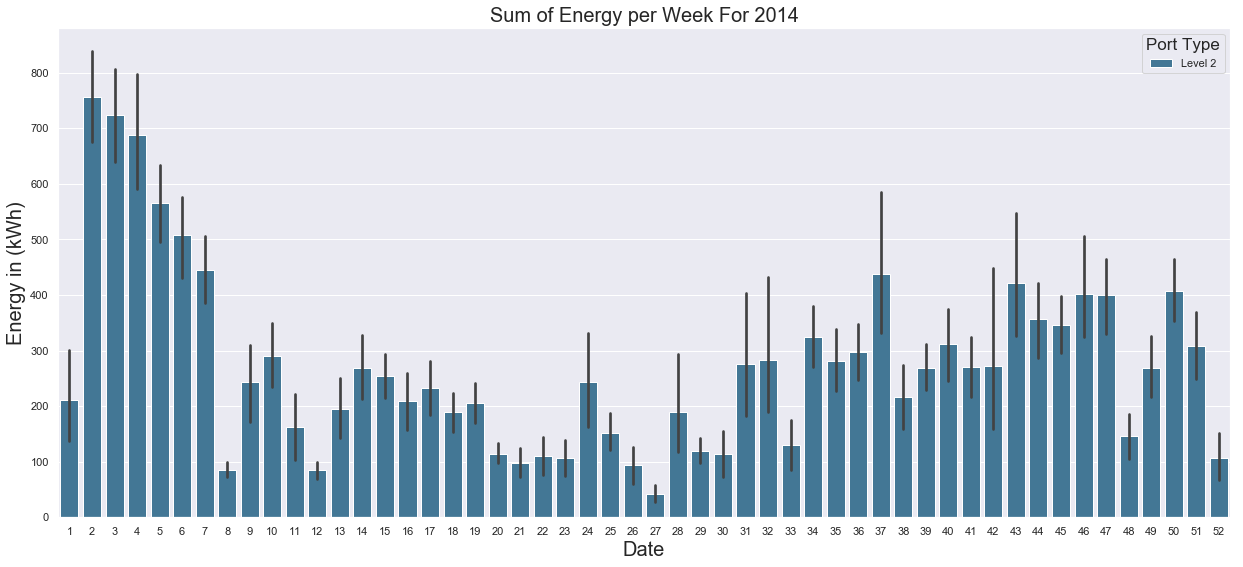

In [ ]:
# Bar plot - sum of energy per week

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

ax = sns.barplot(data = df, x = 'week', y = 'Energy (kWh)', hue = 'Port Type',estimator=np.sum, palette = 'mako')

ax.set(xlabel="Date",
       ylabel="Energy in (kWh)",
       title="Sum of Energy per Week For 2014",
       )
;


''

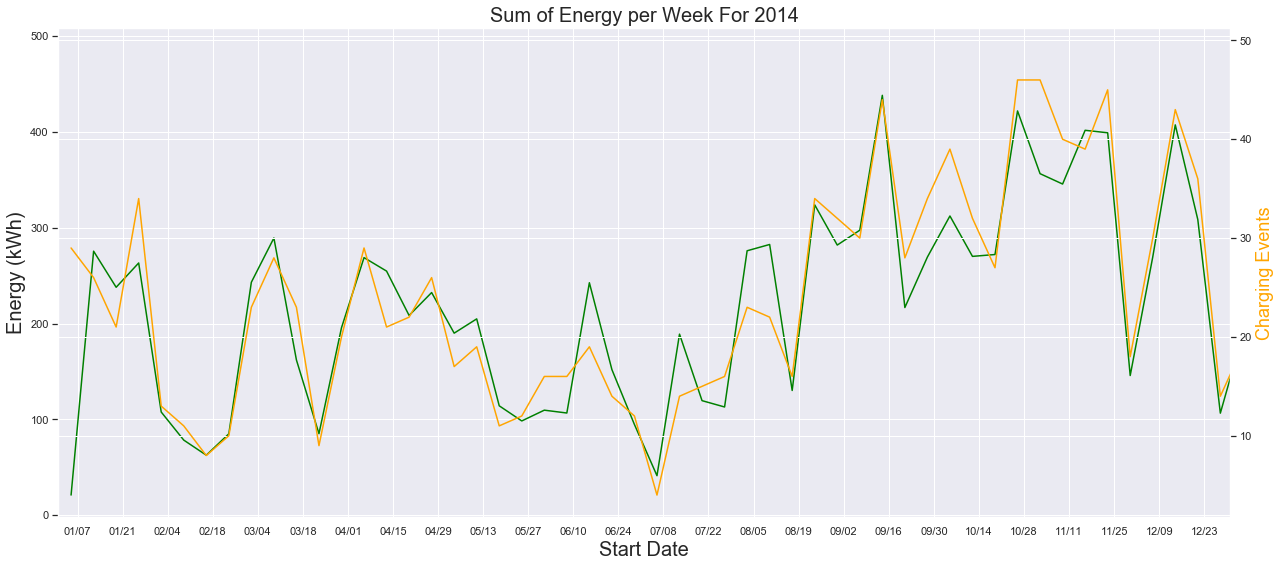

In [ ]:
# Sum of Energy per Day For 2014

sns.set(rc={'figure.figsize':(21,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})


# figure 

ax = sns.lineplot(x = df_graph.index, y = df_graph['Energy (kWh)'], color = 'green'
        )
ax2 = plt.twinx()
ax = sns.lineplot(x = df_graph.index, y = df_graph['count_event'], ax = ax2, color = 'orange')

ax.set(xlabel="Date",
       ylabel="Energy in (kWh)",
       title="Sum of Energy per Week For 2014",
       xlim=["2014-01-01", "2014-12-31"])
       
ax2.set_ylabel("Charging Events",color="orange",fontsize=18)

# have before DateFormatter       
ax.set_xticklabels(df_graph.index, rotation=45, horizontalalignment='right')
# date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)

# tick once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

## 
# axs.set_ylabel('mylabel',size=6)
#fig, ax = plt.subplots(figsize = (21,9))

;

In [ ]:
df.head()

,Label 01,Lable 02,Org Name,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,day_of_week,week,month,count_event
Start Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03 16:51:00,A,A,Georgia Tech,EST,1/3/2014 16:53,EST,1/3/2014 13:53,0:01:59,0:00:00,0.000,...,USD,0.0,Timeout,3,30318,197561.0,4,1,1,1
2014-01-03 17:07:00,A,A,Georgia Tech,EST,1/3/2014 17:07,EST,1/3/2014 14:07,0:02:00,0:00:00,0.000,...,USD,0.0,Timeout,1,NaN,NaN,4,1,1,1
2014-01-04 08:56:00,A,A,Georgia Tech,EST,1/4/2014 9:01,EST,1/4/2014 6:53,0:05:47,0:05:29,0.529,...,USD,0.0,Plug Out at Vehicle,4,30319,168221.0,5,1,1,1
2014-01-04 09:03:00,A,A,Georgia Tech,EST,1/4/2014 16:00,EST,1/4/2014 18:21,6:57:21,3:15:52,10.645,...,USD,0.0,Plug Out at Vehicle,5,30319,168221.0,5,1,1,1
2014-01-04 09:58:00,A,A,Georgia Tech,EST,1/4/2014 9:58,EST,1/4/2014 6:58,0:02:00,0:00:00,0.000,...,USD,0.0,Timeout,2,NaN,NaN,5,1,1,1


In [ ]:
# charging per month 
# sum of energy
# show varables 

''

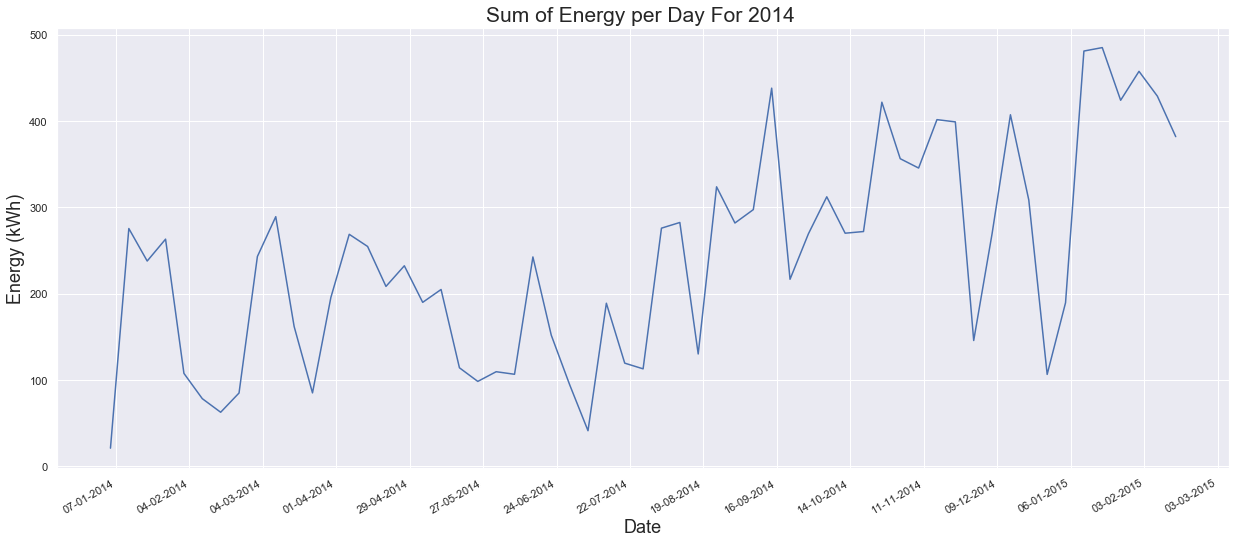

In [ ]:
# Sum of Energy per Day For 2014



sns.lineplot(
    x = df_graph.index, y = df_graph['Energy (kWh)']

);
# Axis labels
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Energy (kWh)", fontsize = 18)
plt.title('Sum of Energy per Day For 2014 ', fontsize = 21)

plt.gcf().autofmt_xdate()

date_format = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    # ax.xaxis.set_minor_locator(mdates.DayLocator())
;

## Questions 
<hr>

In [ ]:
"""
Date can be used to say when and how much load is put on the Grid
Q ?what is the best way to show time on a graph?
Q ?Show amount of energy used per time 
Q ?is there a normal time period when people charge and how much do they charge?
Q ? do users charge normal at the same time?  what is the propability they keep to their pattern?

Q Is there more charge from a particular user zip code?
Q what if we log that charge that it is not taking place at their home charging
Q most popular 'driver postal code'
Q 

basic questions

averge fee 
averge charging time
driver postal code. 

most popular Port type
avg charing time & energy === per port type 

"""

"""
Questons about the data 

how are they computing GHG savings in (KG)
how are they computing Gasoline savings (gallons)

"""

'\nQuestons about the data \n\nhow are they computing GHG savings in (KG)\nhow are they computing Gasoline savings (gallons)\n\n'